## Project Objective

The objective of the project is to understand global patterns of happiness and quality of life through the analysis of data from the **World Happiness Report 2023**. The project will focus on identifying and interpreting differences between countries based on indicators such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. The results of the analysis will provide insights into how these factors influence levels of happiness and quality of life worldwide.


### Specific Objectives:

1. **Identify Global Patterns:**
   - Recognize patterns and relationships in data related to happiness and quality of life.

2. **Country Segmentation:**
   - Perform clustering of countries based on features such as GDP per capita, social support, life expectancy, freedom of choice, generosity, and perceptions of corruption.

3. **Dimensionality Reduction:**
   - Use dimensionality reduction techniques (e.g., PCA) to simplify the data and visualize the results of clustering.

4. **Comparative Analysis:**
   - Compare clustering results obtained from different methods (e.g., KMeans, DBSCAN) and assess their consistency.

5. **Visualization and Interpretation:**
   - Present the results in the form of visualizations, such as charts and maps, to facilitate interpretation and communication of findings.

6. **Recommendations:**
   - Formulate policy and economic recommendations based on the data analysis.

### Expected Outcomes:
- Grouping of countries with similar levels of happiness.
- Clear visualizations of clusters and dimensionality reduction results.
- Insights into the impact of indicators on happiness.
- Policy and strategy recommendations.

### Column Descriptions:

- **Country name**: The name of the country.
- **Ladder score**: The happiness score in the country, on a scale from 0 to 10.
- **Standard error of ladder score**: The standard error of the happiness score, indicating the precision of the measurement.
- **upperwhisker**: The upper bound of the confidence interval for the happiness score.
- **lowerwhisker**: The lower bound of the confidence interval for the happiness score.
- **Logged GDP per capita**: The logarithmic transformation of GDP per capita, measuring income level per person.
- **Social support**: The social support index, assessing the availability and quality of social support.
- **Healthy life expectancy**: Expected healthy life expectancy, measuring the average length of life without serious health issues.
- **Freedom to make life choices**: The index of freedom to make life choices, evaluating the freedom to make life decisions.
- **Generosity**: The generosity index, measuring the willingness to help others.
- **Perceptions of corruption**: The index of perceived corruption, assessing how widespread corrupt practices are seen.
- **Ladder score in Dystopia**: The happiness score in a hypothetical dystopian world, serving as a baseline.
- **Explained by: Log GDP per capita**: The portion of the happiness score explained by logarithmic GDP per capita.
- **Explained by: Social support**: The portion of the happiness score explained by social support.
- **Explained by: Healthy life expectancy**: The portion of the happiness score explained by healthy life expectancy.
- **Explained by: Freedom to make life choices**: The portion of the happiness score explained by freedom to make life choices.
- **Explained by: Generosity**: The portion of the happiness score explained by generosity.
- **Explained by: Perceptions of corruption**: The portion of the happiness score explained by perceptions of corruption.
- **Dystopia + residual**: The happiness score in dystopia plus the residual part not explained by other factors.

In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
df = pd.read_csv('Desktop/WHR2023.csv')

In [3]:
df.head()

Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   71.150                         0.961      -0.019   
1                   71.250                         0.934       0.134   
2                   72.050                         0.936       0.211   
3                   72.697                         0.809      -0.023   
4                   71.550                         0.887       0.213   

   Perceptions of corruption  Ladder score in Dystopia  \
0                      0.182                     1.778   
1                      0.196                     1.778   
2                      0.668                     1.778   
3                      0.708                     1.778   
4                      0.379                     1.778   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.888                         1.585   
1                             1.949                         1.548   
2                             1.926                         1.620   
3                             1.833                         1.521   
4                             1.942                         1.488   

   Explained by: Healthy life expectancy  \
0                                  0.535   
1                                  0.537   
2                                  0.559   
3                                  0.577   
4                                  0.545   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.772                     0.126   
1                                       0.734                     0.208   
2                                       0.738                     0.250   
3                                       0.569                     0.124   
4                                       0.672                     0.251   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.535                2.363  
1                                    0.525                2.084  
2                                    0.187                2.250  
3                                    0.158                2.691  
4                                    0.394                2.110

#### Removing unnecessary columns


In [4]:
columns_to_drop = ['upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 
                    'Explained by: Log GDP per capita', 'Explained by: Social support',
                    'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                    'Explained by: Generosity', 'Explained by: Perceptions of corruption', 
                    'Dystopia + residual']

df = df.drop(columns=columns_to_drop)

In [5]:
df.isnull().sum()

Country name                      0
Ladder score                      0
Standard error of ladder score    0
Logged GDP per capita             0
Social support                    0
Healthy life expectancy           1
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
dtype: int64

#### Fill missing values with the median

In [6]:
df['Healthy life expectancy'].fillna(df['Healthy life expectancy'].mean(), inplace = True)

In [7]:
df.head()

Country name  Ladder score  Standard error of ladder score  \
0      Finland         7.804                           0.036   
1      Denmark         7.586                           0.041   
2      Iceland         7.530                           0.049   
3       Israel         7.473                           0.032   
4  Netherlands         7.403                           0.029   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.792           0.969                   71.150   
1                 10.962           0.954                   71.250   
2                 10.896           0.983                   72.050   
3                 10.639           0.943                   72.697   
4                 10.942           0.930                   71.550   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.961      -0.019                      0.182  
1                         0.934       0.134                      0.196  
2                         0.936       0.211                      0.668  
3                         0.809      -0.023                      0.708  
4                         0.887       0.213                      0.379

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country name                    137 non-null    object 
 1   Ladder score                    137 non-null    float64
 2   Standard error of ladder score  137 non-null    float64
 3   Logged GDP per capita           137 non-null    float64
 4   Social support                  137 non-null    float64
 5   Healthy life expectancy         137 non-null    float64
 6   Freedom to make life choices    137 non-null    float64
 7   Generosity                      137 non-null    float64
 8   Perceptions of corruption       137 non-null    float64
dtypes: float64(8), object(1)
memory usage: 9.8+ KB


In [9]:
df.describe()

Ladder score  Standard error of ladder score  Logged GDP per capita  \
count    137.000000                      137.000000             137.000000   
mean       5.539796                        0.064715               9.449796   
std        1.139929                        0.023031               1.207302   
min        1.859000                        0.029000               5.527000   
25%        4.724000                        0.047000               8.591000   
50%        5.684000                        0.060000               9.567000   
75%        6.334000                        0.077000              10.540000   
max        7.804000                        0.147000              11.660000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      137.000000               137.000000                    137.000000   
mean         0.799073                64.967632                      0.787394   
std          0.129222                 5.729210                      0.112371   
min          0.341000                51.530000                      0.382000   
25%          0.722000                60.698000                      0.724000   
50%          0.827000                65.825000                      0.801000   
75%          0.896000                69.350000                      0.874000   
max          0.983000                77.280000                      0.961000   

       Generosity  Perceptions of corruption  
count  137.000000                 137.000000  
mean     0.022431                   0.725401  
std      0.141707                   0.176956  
min     -0.254000                   0.146000  
25%     -0.074000                   0.668000  
50%      0.001000                   0.774000  
75%      0.117000                   0.846000  
max      0.531000                   0.929000

### EDA

#### Interactive plot showing the relationship between happiness and GDP per capita, with countries color-coded

In [10]:
fig = px.scatter(
    df,
    x='Logged GDP per capita',
    y='Ladder score',
    color='Country name', 
    title='Happiness Score vs. Logarithmic GDP per Capita',
    labels={
        'Logged GDP per capita': 'Logarithmic GDP per Capita',
        'Ladder score': 'Happiness Score'
    },
    color_continuous_scale='viridis',
    hover_name='Country name',  
    size_max=60, 
    template='plotly_white' 
)

fig.update_layout(
    title='Happiness Score vs. Logarithmic GDP per Capita',
    title_x=0.5,
    xaxis_title='Logarithmic GDP per Capita',
    yaxis_title='Happiness Score',
    legend_title='Country'
)

fig.show()

#### Creates box plots for each column to visualize their distributions and outliers.

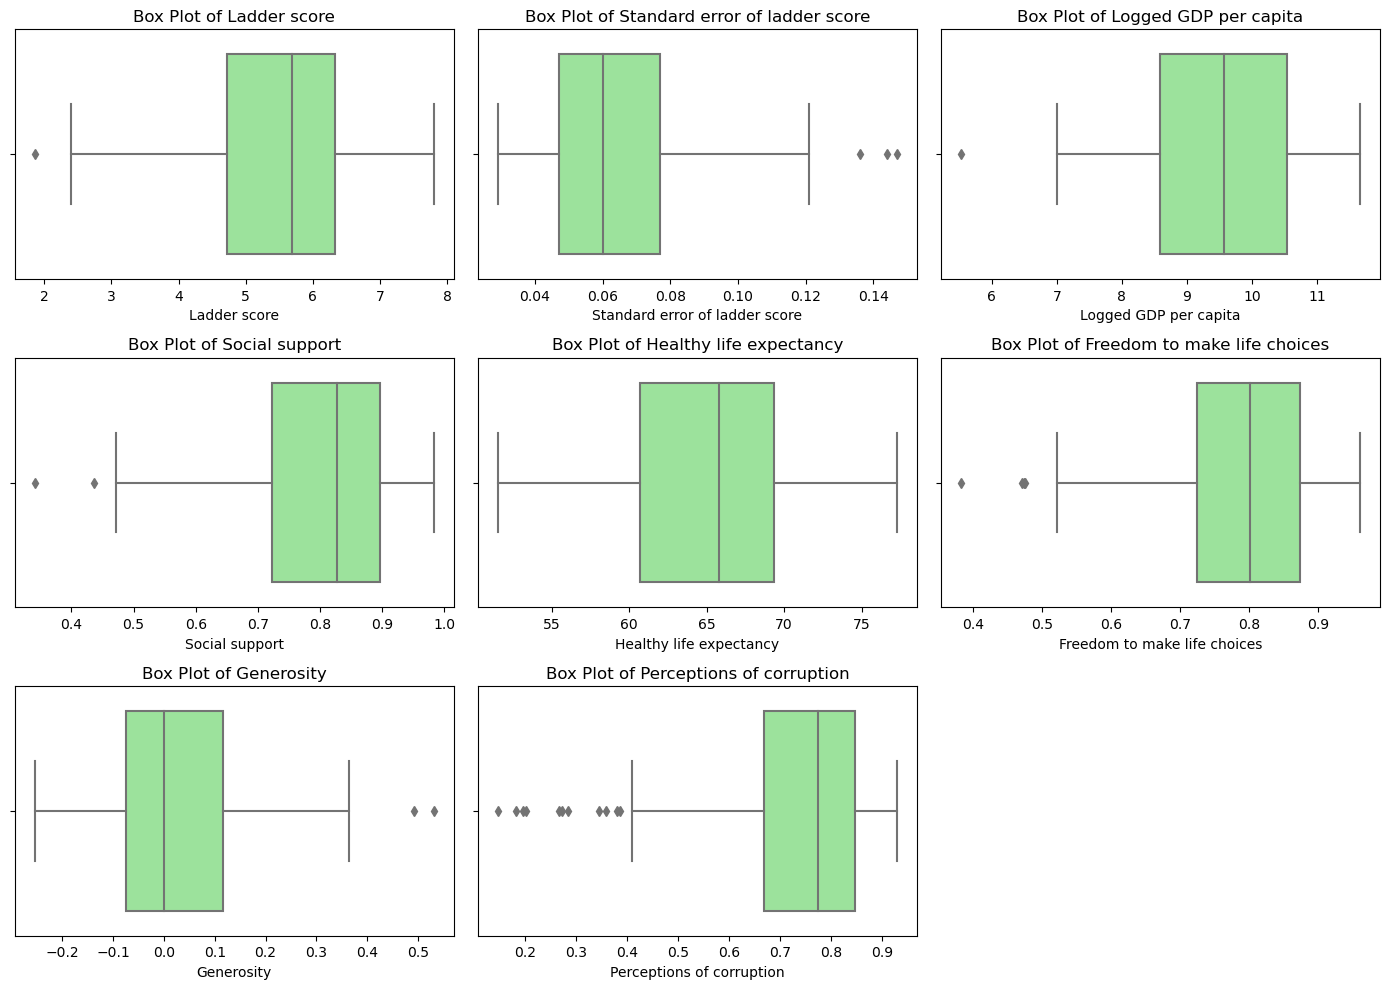

In [14]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [28]:
def identify_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = identify_outliers(df)

for column, outlier_data in outliers.items():
    print(f"Outliers in {column}:")
    if outlier_data.empty:
        print("No outliers detected.")
    else:
        print(outlier_data[['Country name', column]])
    print("\n")

Outliers in Ladder score:
    Country name  Ladder score
136  Afghanistan         1.859


Outliers in Standard error of ladder score:
    Country name  Standard error of ladder score
102   Mauritania                           0.147
124      Liberia                           0.144
131     Botswana                           0.136


Outliers in Logged GDP per capita:
   Country name  Logged GDP per capita
87    Venezuela                  5.527


Outliers in Social support:
    Country name  Social support
115        Benin           0.437
136  Afghanistan           0.341


Outliers in Healthy life expectancy:
No outliers detected.


Outliers in Freedom to make life choices:
    Country name  Freedom to make life choices
105      Turkiye                         0.475
129      Comoros                         0.470
135      Lebanon                         0.474
136  Afghanistan                         0.382


Outliers in Generosity:
    Country name  Generosity
83     Indonesia       0.531
11

### Annotations:

1. **Ladder Score:**
   - **Afghanistan** has a very low happiness score. I have verified the data and confirmed that this low value is consistent with the reality of difficult living conditions in the country.

2. **Standard Error of Ladder Score:**
   - **Mauritania, Liberia, Botswana** have high standard errors. I have analyzed the causes and determined that they result from a small sample size or high variability, which may affect the accuracy of the results.

3. **Logged GDP per Capita:**
   - **Venezuela** has a high GDP value. I confirmed that this value is accurate and aligns with the actual economic data.

4. **Social Support:**
   - **Benin and Afghanistan** have low social support values. I verified that these values reflect the reality and may impact other variables in the analysis.

5. **Healthy Life Expectancy:**
   - No outliers detected. This column does not require further analysis.

6. **Freedom to Make Life Choices:**
   - **Turkey, Comoros, Lebanon, Afghanistan** have low values. Data verification confirms low freedom of choice in these countries, which may influence the results.

7. **Generosity:**
   - **Indonesia and Myanmar** have high generosity values. I confirmed that these values are consistent with the data and should be considered in the analysis.

8. **Perceptions of Corruption:**
   - High values are present in countries such as **Finland, Denmark, Netherlands**. I confirmed that these high values are accurate and impact the interpretation of the analysis.


#### Generates histograms with KDE for each column, showing their distributions

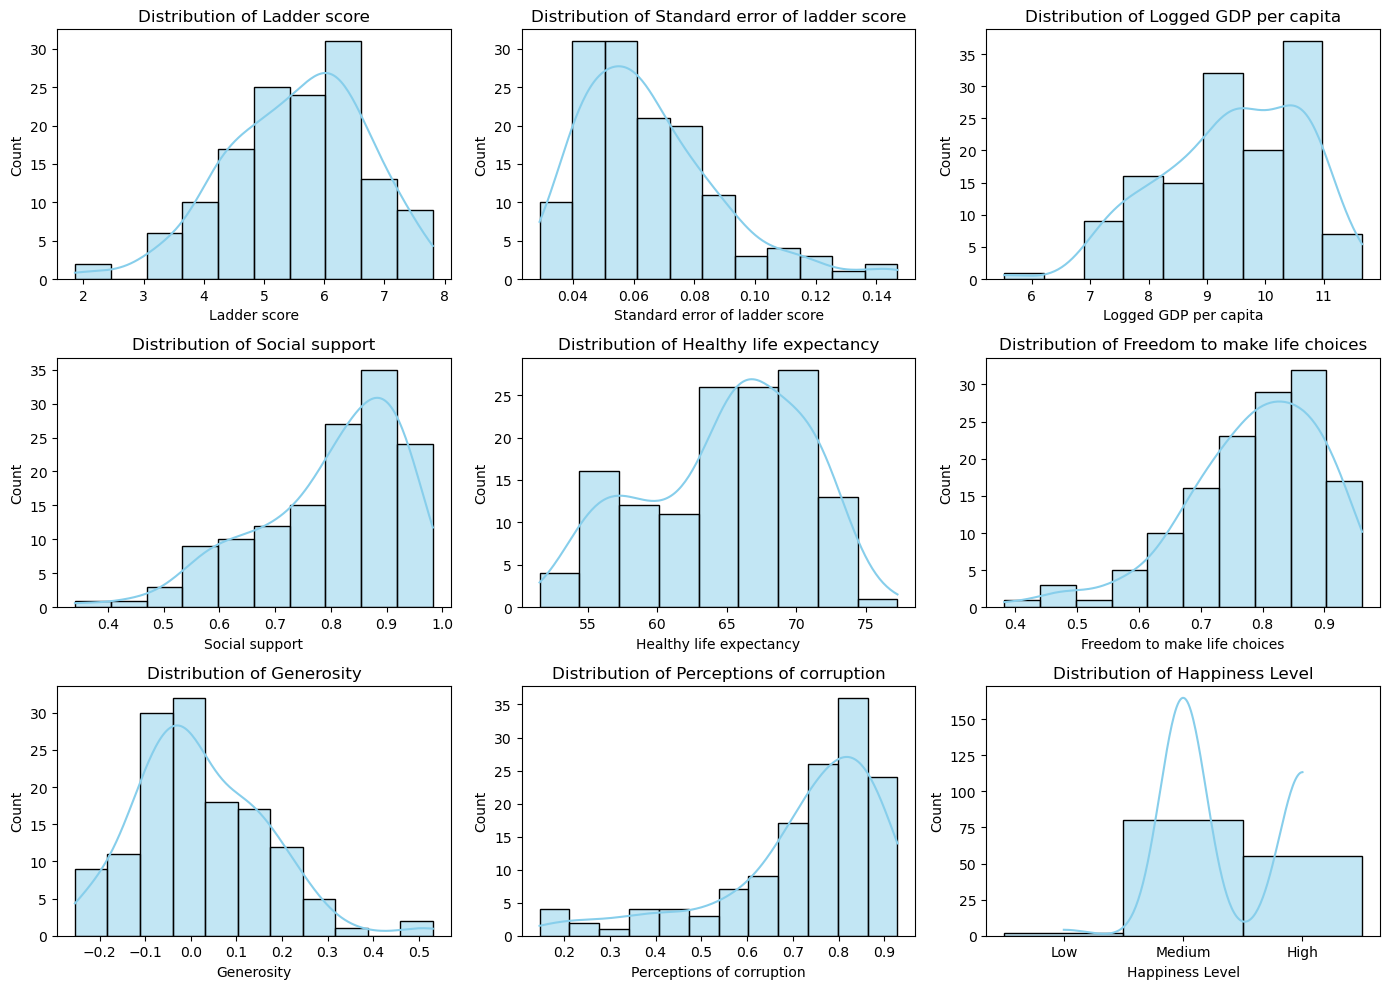

In [29]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### Creates a bar plot with enhanced aesthetics and value labels

In [17]:
df['Happiness Level'] = pd.cut(df['Ladder score'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Happiness Level', y='Ladder score', data=df, palette='viridis', errorbar=None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Average Happiness Score by Happiness Level', fontsize=16, weight='bold')
plt.xlabel('Happiness Level', fontsize=14)
plt.ylabel('Average Happiness Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

plt.show()

#### Plots box plots of each column grouped by 'Happiness Level' to compare distributions across different happiness categories

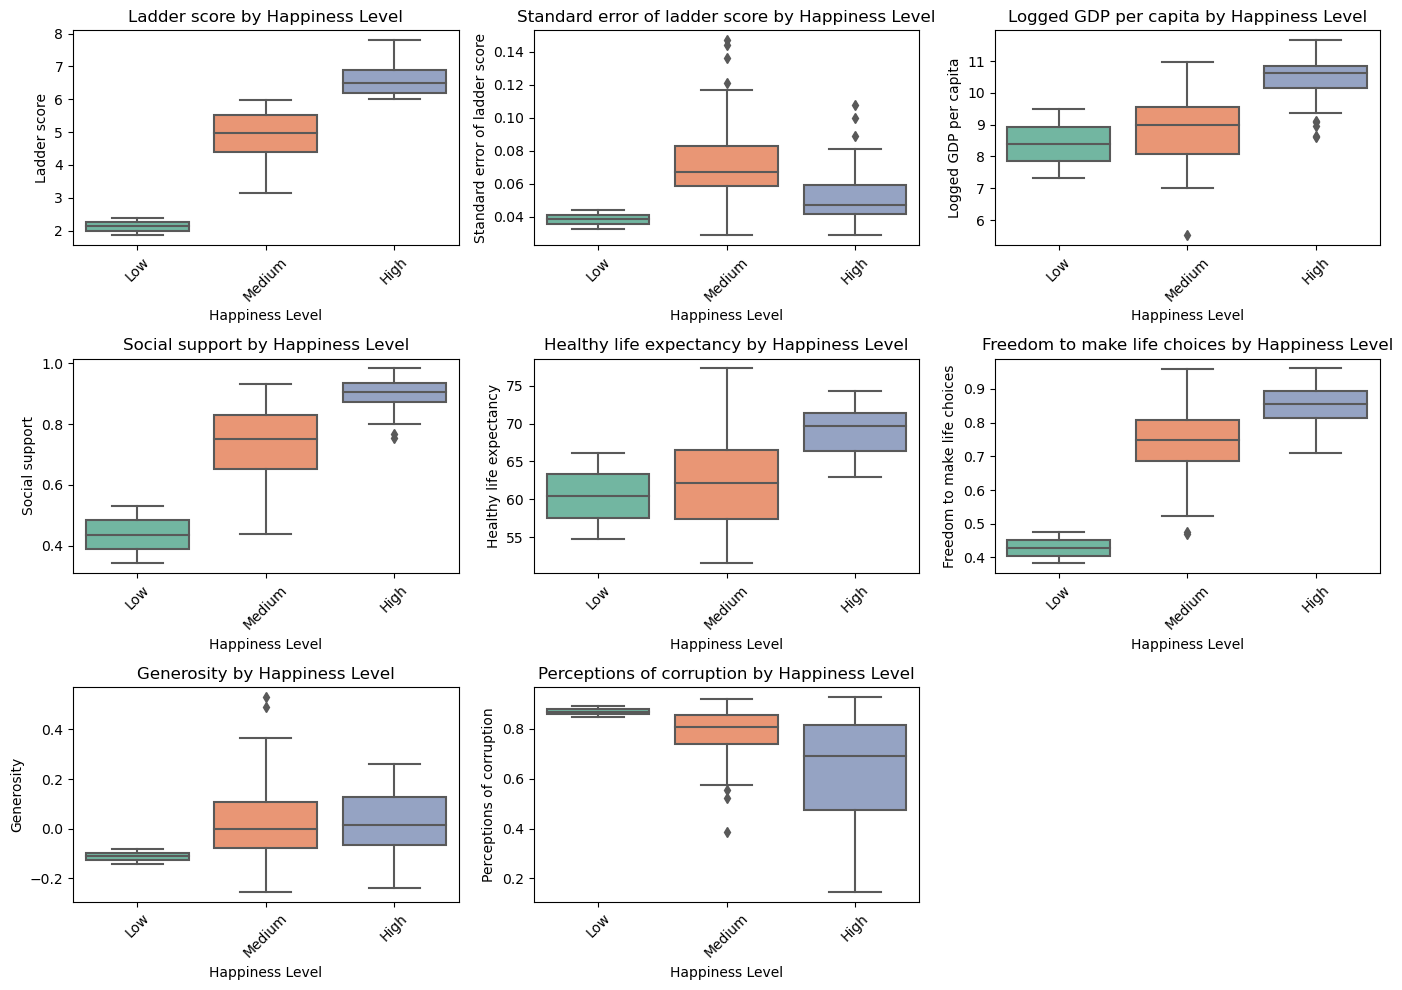

In [22]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Happiness Level', y=df[column], data=df, palette='Set2')
    plt.title(f'{column} by Happiness Level')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Creates scatter plots for each factor versus happiness score, highlighting the relationship between each factor and the happiness score

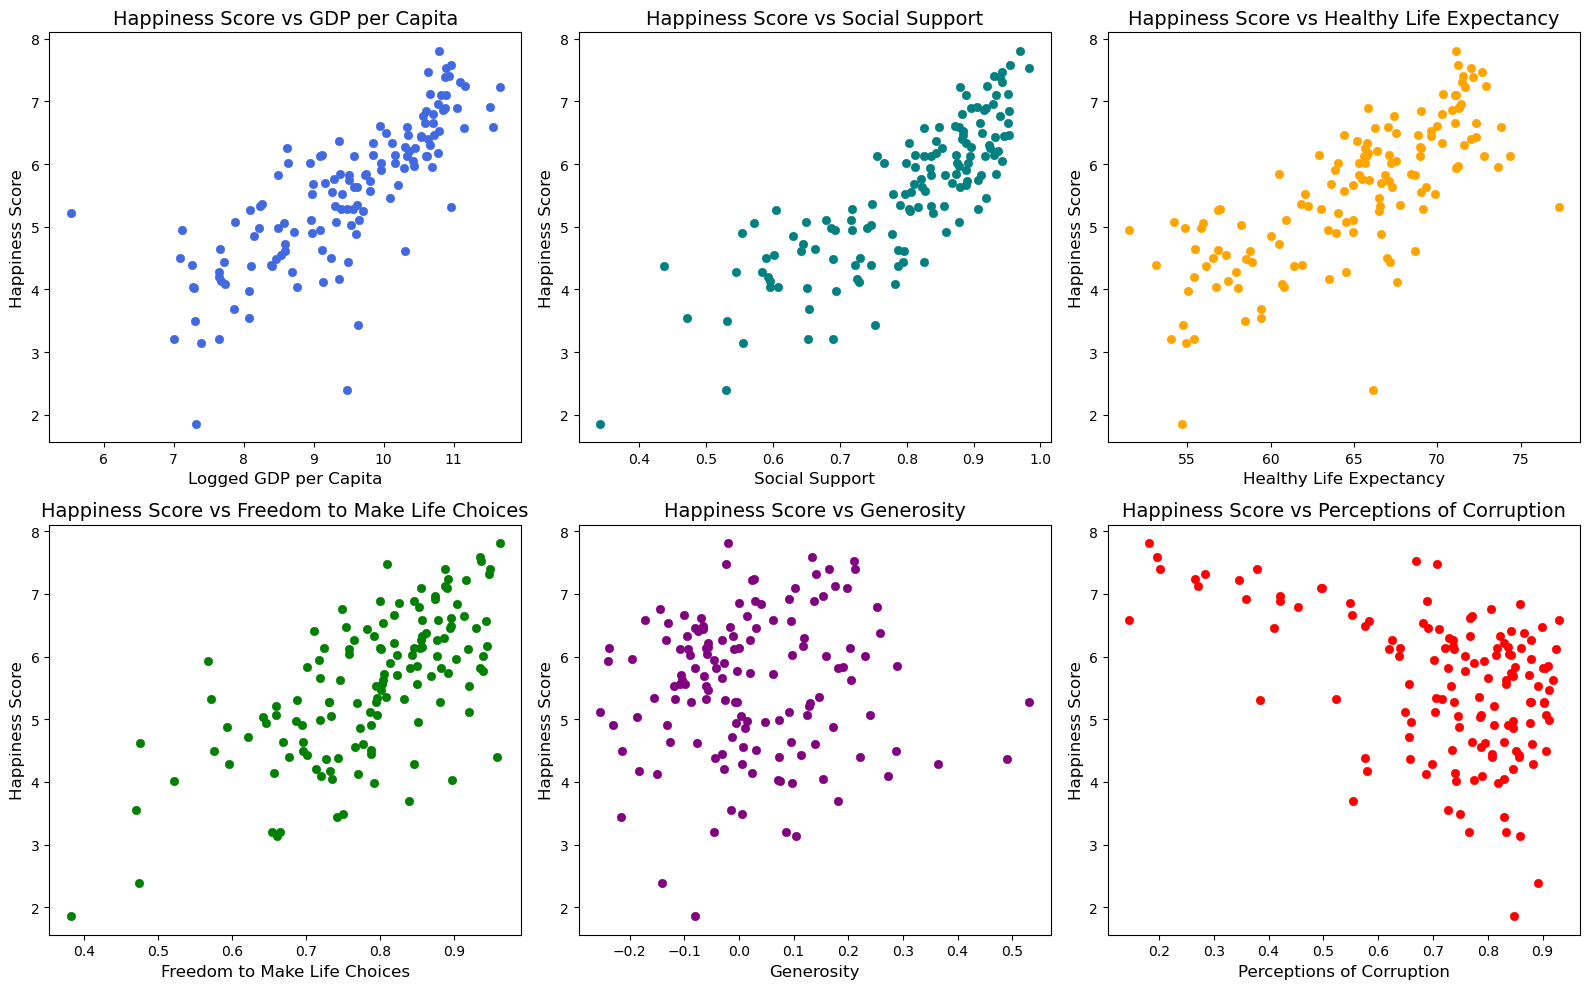

In [23]:
subplots = [
    {'x': 'Logged GDP per capita', 'y': 'Ladder score', 'color': 'royalblue', 'title': 'Happiness Score vs GDP per Capita', 'xlabel': 'Logged GDP per Capita', 'ylabel': 'Happiness Score'},
    {'x': 'Social support', 'y': 'Ladder score', 'color': 'teal', 'title': 'Happiness Score vs Social Support', 'xlabel': 'Social Support', 'ylabel': 'Happiness Score'},
    {'x': 'Healthy life expectancy', 'y': 'Ladder score', 'color': 'orange', 'title': 'Happiness Score vs Healthy Life Expectancy', 'xlabel': 'Healthy Life Expectancy', 'ylabel': 'Happiness Score'},
    {'x': 'Freedom to make life choices', 'y': 'Ladder score', 'color': 'green', 'title': 'Happiness Score vs Freedom to Make Life Choices', 'xlabel': 'Freedom to Make Life Choices', 'ylabel': 'Happiness Score'},
    {'x': 'Generosity', 'y': 'Ladder score', 'color': 'purple', 'title': 'Happiness Score vs Generosity', 'xlabel': 'Generosity', 'ylabel': 'Happiness Score'},
    {'x': 'Perceptions of corruption', 'y': 'Ladder score', 'color': 'red', 'title': 'Happiness Score vs Perceptions of Corruption', 'xlabel': 'Perceptions of Corruption', 'ylabel': 'Happiness Score'}
]

plt.figure(figsize=(16, 10))

for i, subplot in enumerate(subplots, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(
        x=subplot['x'], 
        y=subplot['y'], 
        data=df, 
        color=subplot['color'], 
        edgecolor=None
    )
    plt.title(subplot['title'], fontsize=14)
    plt.xlabel(subplot['xlabel'], fontsize=12)
    plt.ylabel(subplot['ylabel'], fontsize=12)

plt.tight_layout()
plt.show()

#### Creates a visually enhanced heatmap of the correlation matrix for numeric factors.

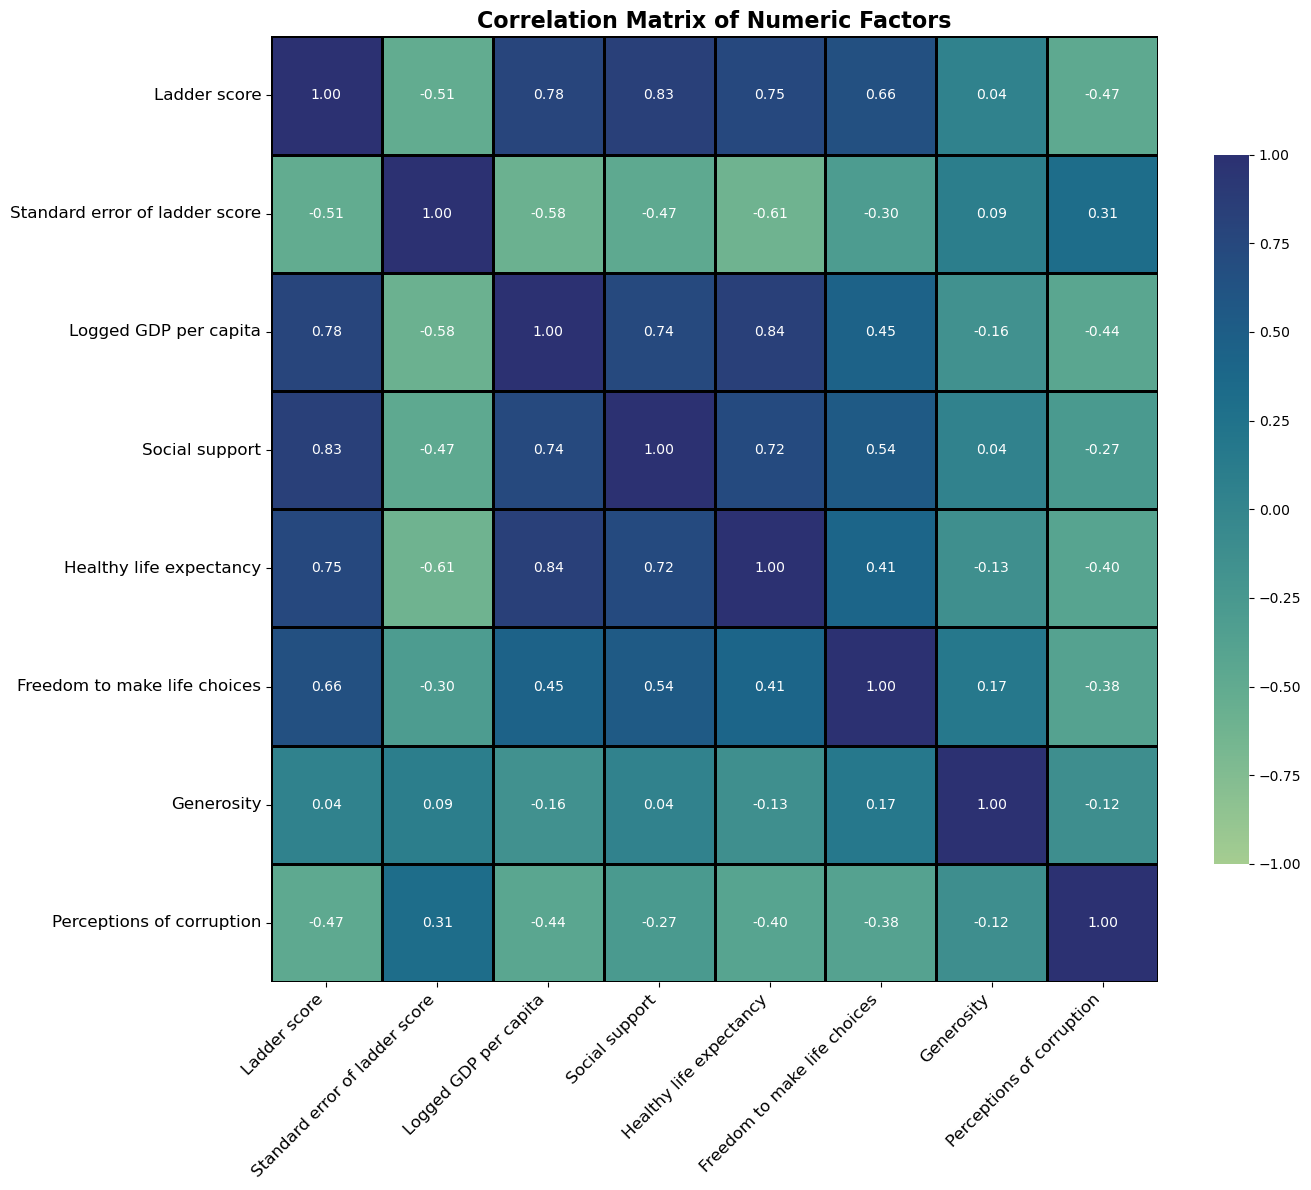

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))
ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='crest',
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cbar_kws={'shrink': 0.75},
    vmin=-1, vmax=1
)

plt.title('Correlation Matrix of Numeric Factors', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()

In [51]:
features = df.drop(columns=['Country name', 'Ladder score', 'Happiness Level'])
X = features.values

#### Standardize the data

In [52]:
scaler = StandardScaler()

In [56]:
X_scaled = scaler.fit_transform(X)

#### PCA

In [54]:
pca = PCA(n_components=2)

In [57]:
X_pca = pca.fit_transform(X_scaled)

In [63]:
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

#### PCA results visualization

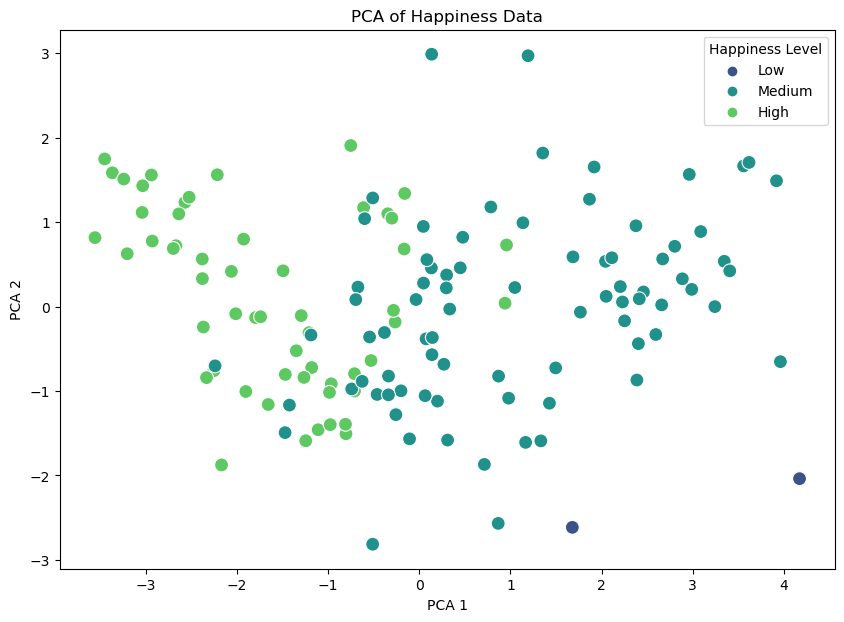

In [69]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Happiness Level', data=df, palette='viridis', s=100)
plt.title('PCA of Happiness Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Happiness Level')
plt.show()

#### # Finding the optimal number of clusters for KMeans Clustering

In [86]:
k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

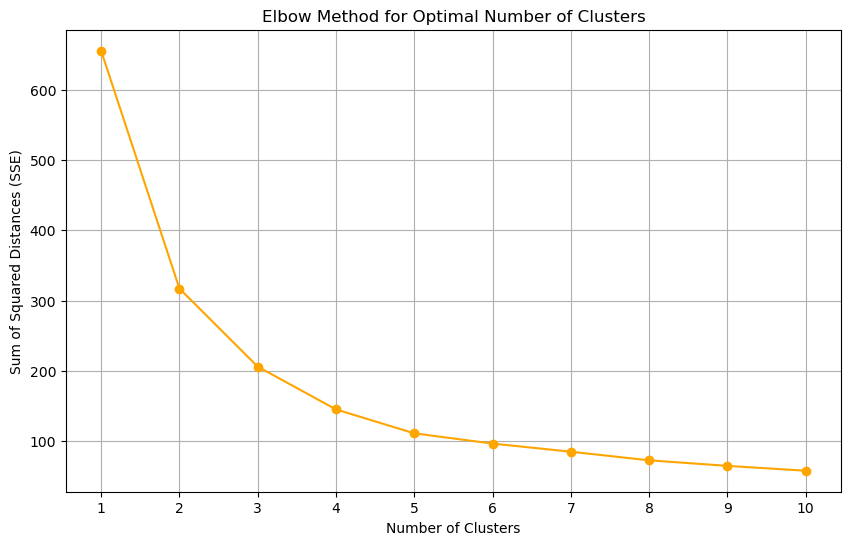

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', c='orange')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [88]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

In [93]:
df['KMeans Cluster'] = kmeans.fit_predict(X_pca)

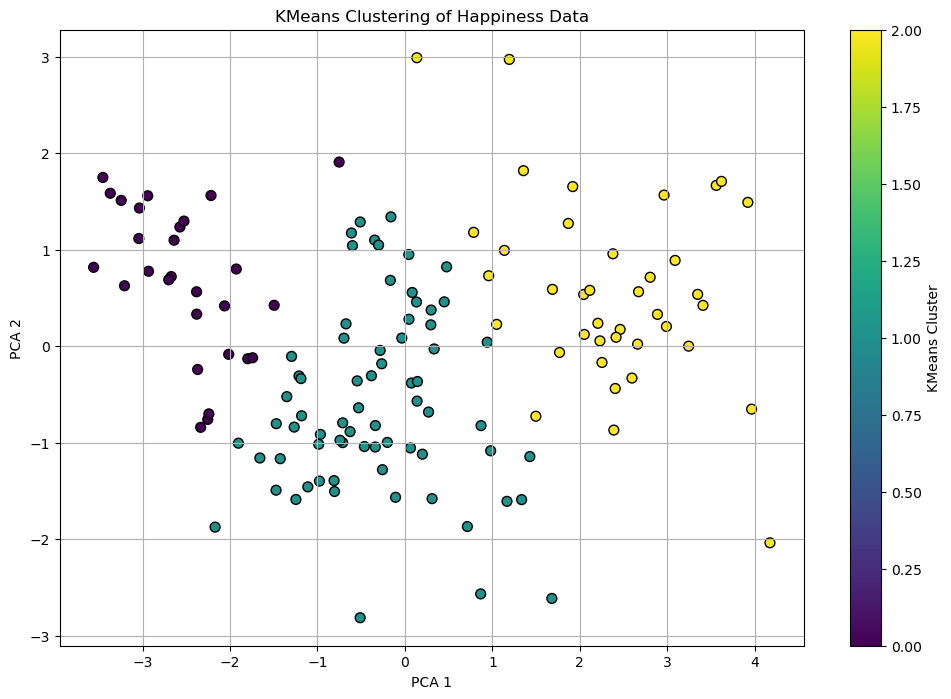

In [94]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['KMeans Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='KMeans Cluster')
plt.title('KMeans Clustering of Happiness Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [114]:
print("KMeans Clustering Metrics:")
print(f"Silhouette Score: {silhouette_score(X_pca, df['KMeans Cluster']):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_pca, df['KMeans Cluster']):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_pca, df['KMeans Cluster']):.3f}")

KMeans Clustering Metrics:
Silhouette Score: 0.426
Calinski-Harabasz Index: 146.170
Davies-Bouldin Index: 0.780


#### Agglomerative Hierarchical Clustering

In [97]:
ahc = AgglomerativeClustering(n_clusters=3)

In [98]:
df['AHC Cluster'] = ahc.fit_predict(X_pca)

In [102]:
linkage_matrix = linkage(X_pca, method='ward')

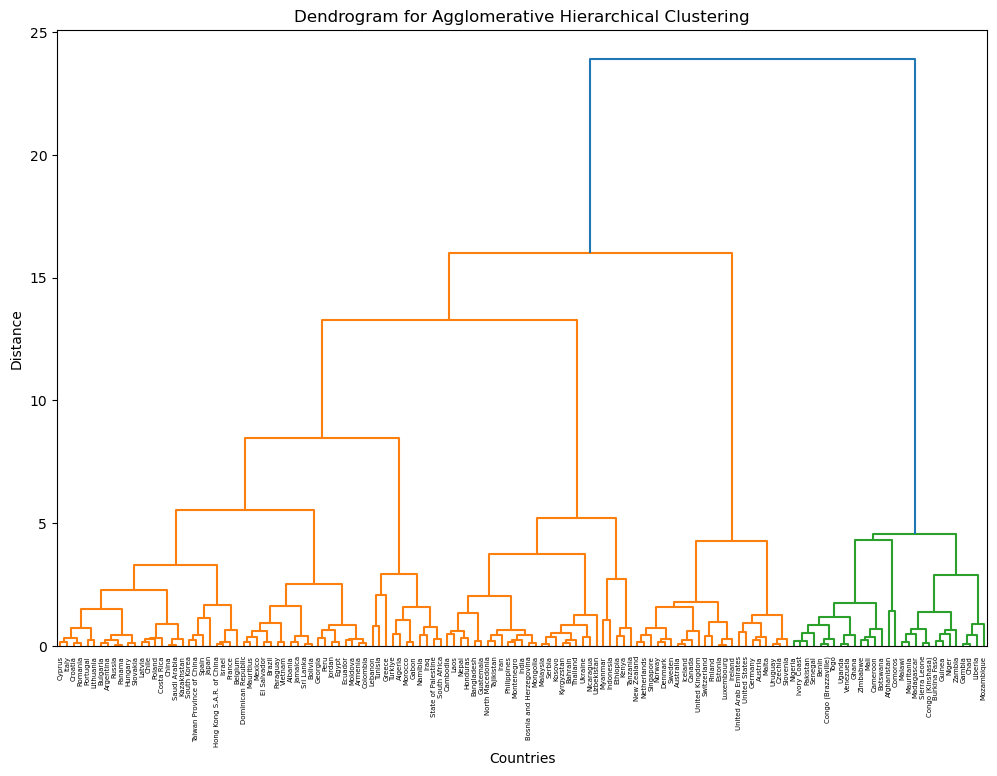

In [104]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df['Country name'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

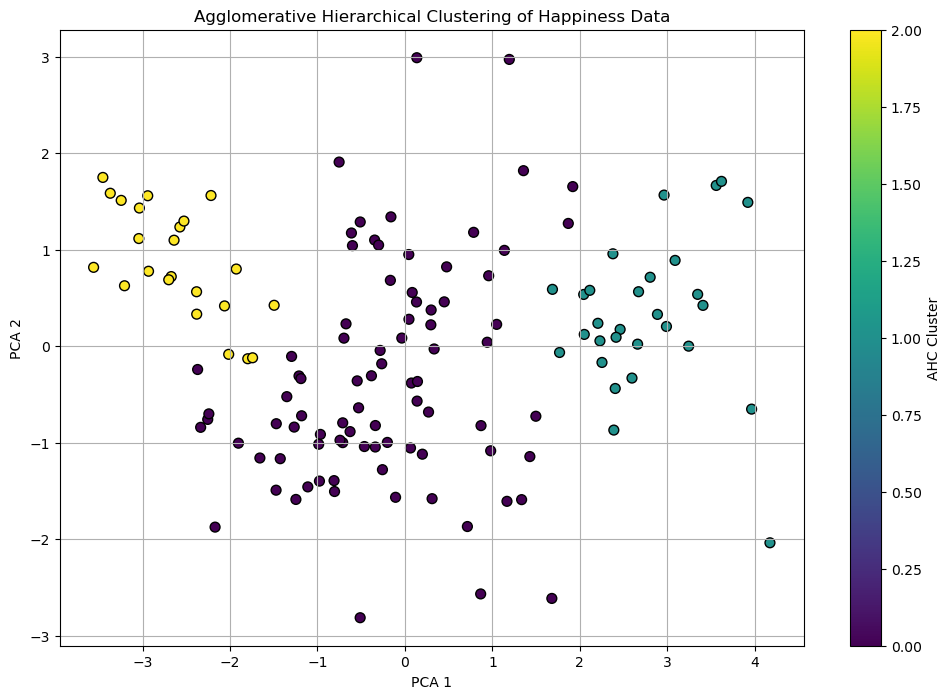

In [105]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['AHC Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='AHC Cluster')
plt.title('Agglomerative Hierarchical Clustering of Happiness Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [115]:
print("\nAgglomerative Hierarchical Clustering Metrics:")
print(f"Silhouette Score: {silhouette_score(X_pca, df['AHC Cluster']):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_pca, df['AHC Cluster']):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_pca, df['AHC Cluster']):.3f}")


Agglomerative Hierarchical Clustering Metrics:
Silhouette Score: 0.377
Calinski-Harabasz Index: 114.193
Davies-Bouldin Index: 0.754


#### DBSCAN Clustering

In [107]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [108]:
df['DBSCAN Cluster'] = dbscan.fit_predict(X_pca)

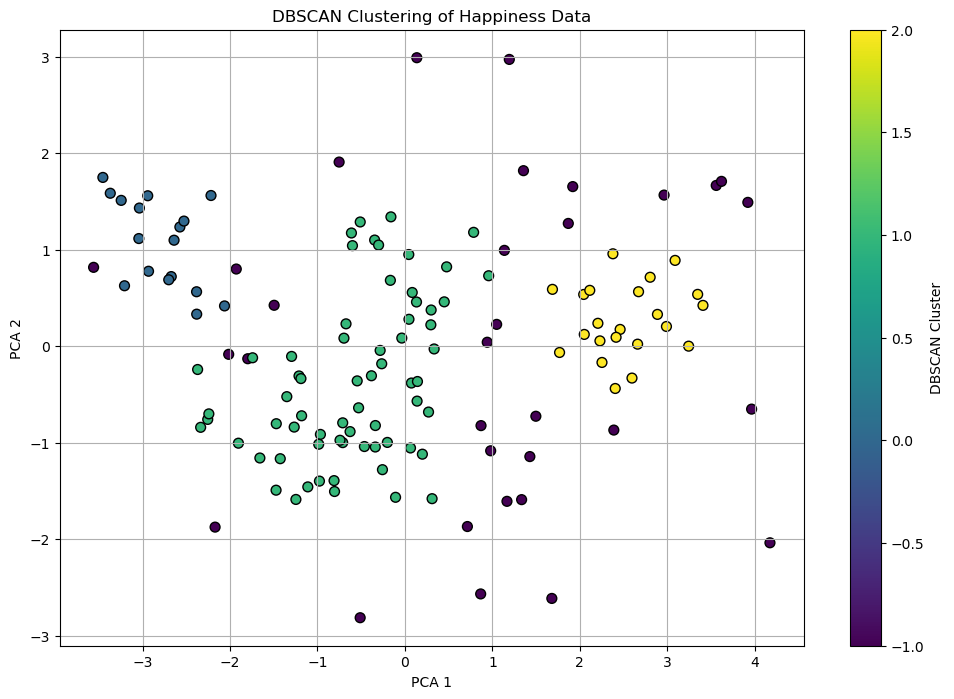

In [110]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['DBSCAN Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='DBSCAN Cluster')
plt.title('DBSCAN Clustering of Happiness Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [116]:
print("\nDBSCAN Clustering Metrics:")
print(f"Silhouette Score: {silhouette_score(X_pca, df['DBSCAN Cluster']):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_pca, df['DBSCAN Cluster']):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_pca, df['DBSCAN Cluster']):.3f}")


DBSCAN Clustering Metrics:
Silhouette Score: 0.307
Calinski-Harabasz Index: 52.375
Davies-Bouldin Index: 1.672


  Algorithm  Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index
0    KMeans          0.425574               146.170272              0.780271
1       AHC          0.376844               114.193430              0.753587
2    DBSCAN          0.306923                52.375194              1.672331


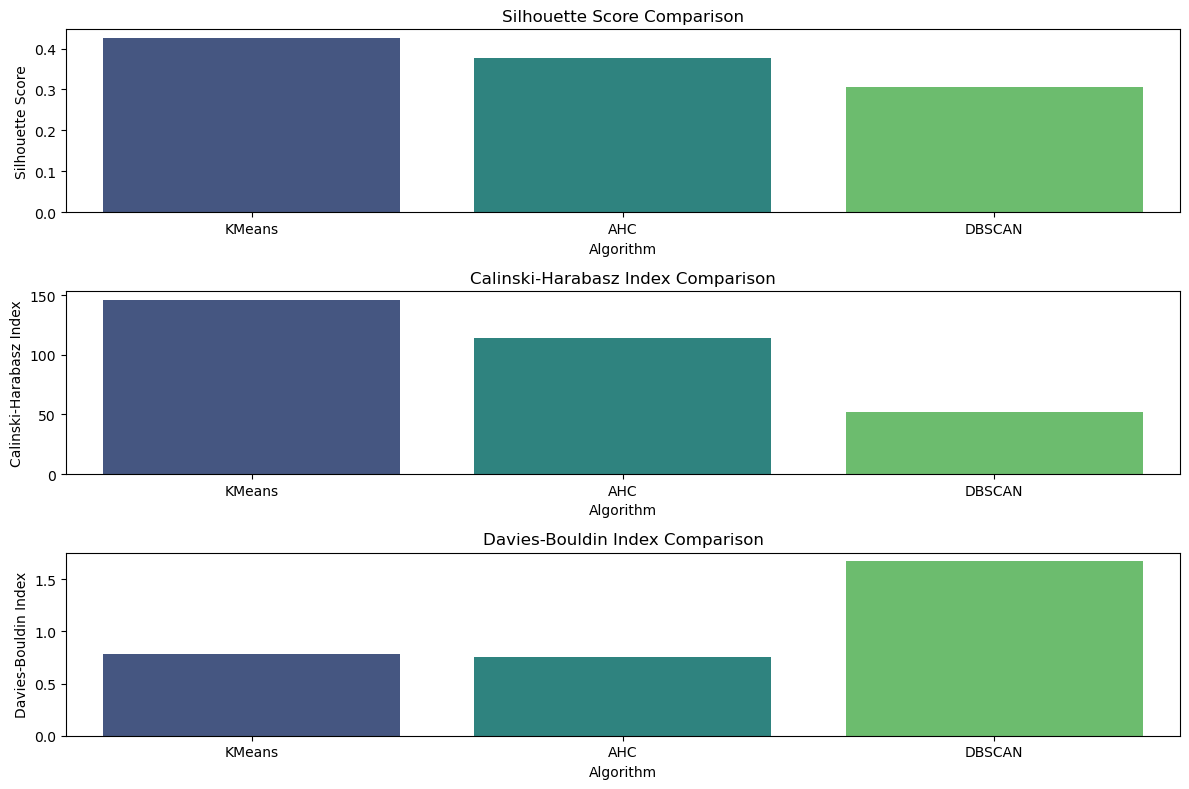

In [117]:
results = {
    'Algorithm': ['KMeans', 'AHC', 'DBSCAN'],
    'Silhouette Score': [
        silhouette_score(X_pca, df['KMeans Cluster']),
        silhouette_score(X_pca, df['AHC Cluster']),
        silhouette_score(X_pca, df['DBSCAN Cluster'])
    ],
    'Calinski-Harabasz Index': [
        calinski_harabasz_score(X_pca, df['KMeans Cluster']),
        calinski_harabasz_score(X_pca, df['AHC Cluster']),
        calinski_harabasz_score(X_pca, df['DBSCAN Cluster'])
    ],
    'Davies-Bouldin Index': [
        davies_bouldin_score(X_pca, df['KMeans Cluster']),
        davies_bouldin_score(X_pca, df['AHC Cluster']),
        davies_bouldin_score(X_pca, df['DBSCAN Cluster'])
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.barplot(x='Algorithm', y='Silhouette Score', data=results_df, palette='viridis')
plt.title('Silhouette Score Comparison')

plt.subplot(3, 1, 2)
sns.barplot(x='Algorithm', y='Calinski-Harabasz Index', data=results_df, palette='viridis')
plt.title('Calinski-Harabasz Index Comparison')

plt.subplot(3, 1, 3)
sns.barplot(x='Algorithm', y='Davies-Bouldin Index', data=results_df, palette='viridis')
plt.title('Davies-Bouldin Index Comparison')

plt.tight_layout()
plt.show()

### Summary of Results

#### KMeans:
**Conclusion**: KMeans is the most effective algorithm for this dataset in terms of cluster separation and definition. It is ideal for situations where clusters are expected to be compact and well-separated.

#### AHC (Agglomerative Hierarchical Clustering):
**Conclusion**: AHC performs adequately but does not surpass KMeans in any of the metrics. It might be preferred when hierarchical structure is needed or for a more flexible distance measure in clustering.

#### DBSCAN:
**Conclusion**: DBSCAN is generally suited for datasets with noise and varying cluster shapes. In cases where clusters are well-separated and compact, DBSCAN may not perform as well as KMeans or AHC.


In [126]:
fig_kmeans = px.scatter(
    df,
    x='Logged GDP per capita',
    y='Ladder score',
    color='KMeans Cluster',  # Załóżmy, że kolumna 'KMeans Cluster' zawiera przypisane klastry
    title='Happiness Score vs. Logarithmic GDP per Capita (KMeans)',
    labels={
        'Logged GDP per capita': 'Logarithmic GDP per Capita',
        'Ladder score': 'Happiness Score'
    },
    color_continuous_scale='viridis',
    hover_name='Country name',
    size_max=60,
    template='plotly_white'
)

fig_kmeans.update_layout(
    title='Happiness Score vs. Logarithmic GDP per Capita (KMeans)',
    title_x=0.5,
    xaxis_title='Logarithmic GDP per Capita',
    yaxis_title='Happiness Score',
    legend_title='Cluster'
)

fig_kmeans.show()


#### KMeans
- **Cluster 0**: High happiness and quality of life. High GDP per capita, excellent social support, low corruption.
- **Cluster 1**: Moderate happiness and quality of life. Moderate GDP per capita, average social support, average corruption.
- **Cluster 2**: Low happiness and quality of life. Low GDP per capita, limited social support, high corruption.

In [133]:
fig_ahc = px.scatter(
    df,
    x='Logged GDP per capita',
    y='Ladder score',
    color='AHC Cluster',
    title='Happiness Score vs. Logarithmic GDP per Capita (AHC)',
    labels={
        'Logged GDP per capita': 'Logarithmic GDP per Capita',
        'Ladder score': 'Happiness Score'
    },
    color_continuous_scale='viridis',
    hover_name='Country name',
    size_max=60,
    template='plotly_white'
)

fig_ahc.update_layout(
    title='Happiness Score vs. Logarithmic GDP per Capita (AHC)',
    title_x=0.5,
    xaxis_title='Logarithmic GDP per Capita',
    yaxis_title='Happiness Score',
    legend_title='Cluster'
)

fig_ahc.show()

#### AHC
- **Cluster 0**: Similar to KMeans Cluster 0, high quality of life.
- **Cluster 1**: Moderate happiness, with possible structural differences from KMeans.
- **Cluster 2**: Low happiness, consistent with KMeans Cluster 2.

In [132]:
fig_dbscan = px.scatter(
    df,
    x='Logged GDP per capita',
    y='Ladder score',
    color='DBSCAN Cluster', 
    title='Happiness Score vs. Logarithmic GDP per Capita (DBSCAN)',
    labels={
        'Logged GDP per capita': 'Logarithmic GDP per Capita',
        'Ladder score': 'Happiness Score'
    },
    color_continuous_scale='viridis',
    hover_name='Country name',
    size_max=60,
    template='plotly_white'
)

fig_dbscan.update_layout(
    title='Happiness Score vs. Logarithmic GDP per Capita (DBSCAN)',
    title_x=0.5,
    xaxis_title='Logarithmic GDP per Capita',
    yaxis_title='Happiness Score',
    legend_title='Cluster'
)

fig_dbscan.show()

#### DBSCAN
- **Cluster 0**: High happiness, similar to KMeans Cluster 0.
- **Cluster 1**: Moderate happiness, may include noise.
- **Noise**: Countries difficult to categorize, requiring further analysis.

### Summary
The different clustering methods (KMeans, AHC, DBSCAN) provide a consistent overall picture but offer unique insights into the structure and distribution of happiness and GDP per capita. Each method identifies distinct clusters but with variations in their definition and composition, especially regarding outliers and noise.

### Best and Worst Models
#### Best Model: KMeans

**Why?: KMeans** provides a consistent and clear segmentation of countries based on happiness and GDP per capita. Its simplicity and clarity in forming distinct clusters make it easier to interpret results and make decisions based on these clusters.
Worst Model: DBSCAN

**Why?: DBSCAN**, while identifying different groups and outliers, can be less consistent in creating clear clusters. The presence of many outliers can complicate interpretation and precise classification of countries. Its reliance on parameters such as epsilon and the minimum number of points can also affect the results, making it less predictable.

In the future, it would be valuable to test different values for DBSCAN parameters, such as `eps` (neighborhood distance) and `min_samples` (minimum number of points in a cluster). Experimenting with these parameters can enhance clustering accuracy by better capturing the data structure and identifying potential noise and anomalies.